In [1]:
# https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Mounting the google colab drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import chardet
with open("/content/drive/MyDrive/Xccelerate/ML Project/Online Payments Fraud Detection Dataset.csv",'rb') as rawdata:
  result=chardet.detect(rawdata.read(100000))
result

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Xccelerate/ML Project/Online Payments Fraud Detection Dataset.csv", encoding='ISO-8859-1')


In [6]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.drop(['nameOrig','nameDest'],axis='columns',inplace=True)

In [8]:
# 150k

#df=df.iloc[:1500000,:] 

In [9]:
df.shape

(6362620, 9)

In [10]:
df.isFraud.value_counts()/len(df)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

In [11]:
# The data is highly imbalanced.

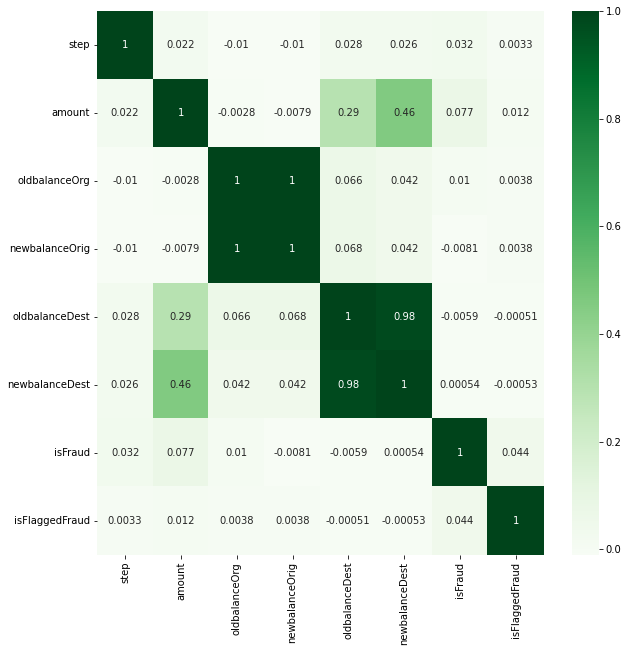

In [12]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Greens")

In [13]:
#Get the Independent and Dependent Features
X=df.iloc[:,0:7]
Y=df.iloc[:,7]

In [14]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [15]:
Y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [16]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [17]:
# Dummy Encoding
type=pd.get_dummies(X['type'],drop_first=True)
#Dummy Trap

In [18]:
type.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [19]:
# Dropped 4 columns

X=pd.concat([X,type],axis=1)
X=X.drop(['type','DEBIT','PAYMENT','CASH_OUT','TRANSFER'],axis='columns')
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0


In [20]:
"""
Feature Scaling
"""

'\nFeature Scaling\n'

In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
len(X_train)

5090096

In [23]:
len(X_test)

1272524

In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
#Call the kNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#Initiating the classifier
classifier_kn = KNeighborsClassifier()
#Passing the data to the classifier
classifier_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Predicting the Test set results
y_pred_kn = classifier_kn.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
result = confusion_matrix(y_test, y_pred_kn)
print('Confusion Matrix')
print(result)

Confusion Matrix
[[1270842      41]
 [    697     944]]


In [28]:
result1 = classification_report(y_test, y_pred_kn)
print('Classification Report')
print(result1)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.96      0.58      0.72      1641

    accuracy                           1.00   1272524
   macro avg       0.98      0.79      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



In [29]:
result2 = accuracy_score(y_test, y_pred_kn)
print('Accuracy: ', result2)

Accuracy:  0.9994200502308798
